<a href="https://colab.research.google.com/github/sergiokapone/Fitting/blob/main/Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

С. М. Пономаренко

# Апроксимація результатів вимірювання

Часто, результатом фізичного експерименту є виміряні значення пар величин $(x_i, y_i)$. Прийнято величини $y_i$ вважати залежними від величин $x_i$.

In [ ]:
#@title Завантаження пакетів { vertical-output: true }
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from ipywidgets import interact
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

Камінь кинули вгору. Зняли вимірювання залежності висоти каменя над поверхнею землі від часу [$t$ (с), $y$ (м), $\Delta y$ (м)] 

In [ ]:
#@title Експериментальні дані { vertical-output: true }
data_array = np.array([
          [0.0, 0.16, 0.42],
          [0.1, 3.12, 0.53],
          [0.2, 2.82, 0.55],
          [0.3, 3.70, 0.48],
          [0.4, 4.39, 0.45],
          [0.5, 5.90, 0.51],
          [0.6, 5.45, 0.48],
          [0.7, 7.27, 0.48],
          [0.8, 6.39, 0.44],
          [0.9, 6.91, 0.50],
          [1.0, 7.03, 0.52],
          [1.1, 8.13, 0.49],
          [1.2, 8.00, 0.51],
          [1.3, 7.56, 0.52],
          [1.4, 8.45, 0.57],
          [1.5, 7.95, 0.50],
          [1.6, 7.97, 0.43],
          [1.7, 6.89, 0.50],
          [1.8, 7.19, 0.54],
          [1.9, 6.49, 0.46],
          [2.0, 4.98, 0.53],
])
d = pd.DataFrame(data_array, columns = ['time','pos','spos'])
d

,time,pos,spos
0,0.0,0.16,0.42
1,0.1,3.12,0.53
2,0.2,2.82,0.55
3,0.3,3.70,0.48
4,0.4,4.39,0.45
5,0.5,5.90,0.51
6,0.6,5.45,0.48
7,0.7,7.27,0.48
8,0.8,6.39,0.44
9,0.9,6.91,0.50


Будуємо експериментальні точки з вказанням похибок $\Delta y$ у виміряних значеннях висоти підняття каменя $y$.

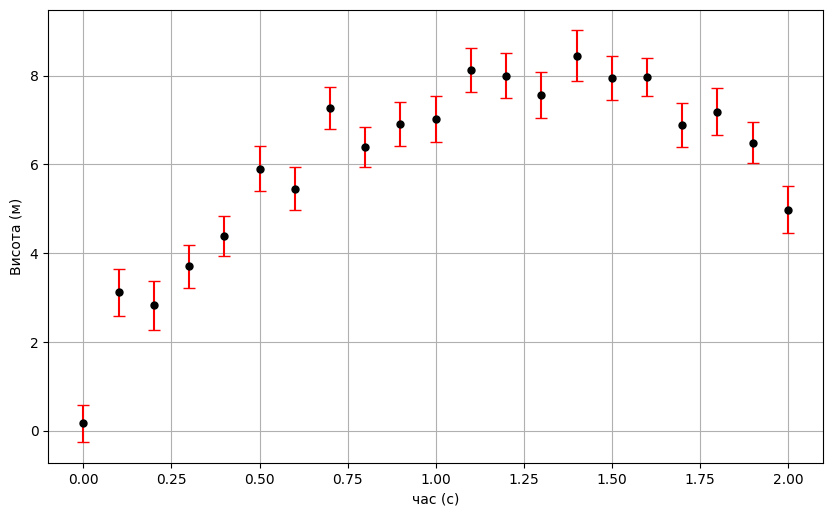

In [ ]:
#@title Графік залежності висоти $y(t)$
plt.errorbar(d['time'],d['pos'],d['spos'], fmt='o', ecolor = 'r', color = 'k',  markersize=5, capsize=4)
plt.grid(True)
plt.ylabel("Висота (м)")
plt.xlabel("час (с)")
plt.savefig("dataonly.pdf")

## Метод найменших квадратів

Зазвичай, на практиці з якихось апріорних чи теоретичних міркувань відомо, який аналітичний вигляд має функція $y = f (x| p_1, p_2, \ldots, p_p)$, що описує експериментальні дані, а невідомими є $p$ штук числових величин $p_i$ $(i = 1 \ldots p)$. Така аналітична функція називається *моделлю*, а величини $p_i$ називаються *параметрами* моделі.

Виникає задача, як підібрати значення параметрів так, щоб графік функції проходив якомога ближче до експериментальних точок? Така процедура називається апроксимацією.

---

(В англомовній літературі ця процедура називається "fitting", що дослівно перекладається як "підгонка" параметрів моделі).

---


Нехай у нас є експериментальні дані $(x_i, y_i)$, ми намагаємось застосувати модель  $y = f(x)$.

Позначимо відстань від $i$-ї експериментальної точки до шуканої прямої, що виміряна по вертикалі як $\Delta y_i$ (цей доданок називається *лишком*):
\begin{equation}
	\Delta y_i = y_i - f(x_i| p_1, p_2, \ldots, p_p)
\end{equation}
і знайдемо суму
\begin{equation}
	\chi^2(p_1, p_2, \ldots, p_p) = \sum\limits_{i = 1}^n  \left(\frac{y_i - f(x_i| p_1, p_2, \ldots, p_p)}{\sigma_{y_i}}\right)^2
\end{equation}
яка залежить від параметрів $p_1, p_2, \ldots, p_p$. Параметри підбираються так, щоб $\chi^2(p_1, p_2, \ldots, p_p) \to \min$. Така сума називається зваженою сумою квадратичних лишків.

Даний метод побудови найкращої прямої називається методом найменших квадратів.

У випадку, якщо більша частина відхилень даних від моделі буде порядку середньоквадратичної похибки, тобто $\Delta y_i \approx \sigma_{y_i}$, то сума $\chi^2$ буде за порядком величини дорівнювати числу доданків, що входять в неї, тобто $\chi^2 \approx n$.

---

Спробуйте самостійно підібрати параметри $y_0$, $v_0$ та $a$ моделі $y = y_0 + v_0 t + \frac{at^2}{2}$ рухаючи повзунки.  Спостерігайте за значенням $\chi^2$. Модель буде найкраще описувати дані, якщо $\chi^2$ буде наближено дорівнювати числу експериметальних точок ($n = 21$ в нашому випадку, тобто $\chi^2 \approx 21$).

---

In [ ]:
#@title Ручний підбір параметрів
def HandChoise(y0,v0,a):
    def model(t,y0,v0,a):
        return y0 + v0*t + 0.5*a*t**2

    init_guess = [1,1,-10]

    plt.errorbar(d['time'],d['pos'],d['spos'], fmt='o', ecolor = 'r', color = 'k',  markersize=5, capsize=4, label="дані")
    plt.ylabel("Висота (м)")
    plt.xlabel("час (с)")
    plt.grid(True)

    t = np.linspace(0,2)
    plt.plot(t,model(t,y0,v0,a), color = 'b', label="модель")
    plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', borderaxespad=0.)
    
    chisq = sum((d['pos'] - model(d['time'],y0,v0,a))**2/d['spos']**2)
    
    plt.title("$\\chi^2 = %.2f$"%chisq)

interact(HandChoise,y0=(-2.0,5.0),v0=(0.0,20.0),a=(-15.0,-5.0))

interactive(children=(FloatSlider(value=1.5, description='y0', max=5.0, min=-2.0), FloatSlider(value=10.0, des…

<function __main__.HandChoise>

Метод найменших квадратів в якому враховуються лише похибки залежних змінних $y_i$ реалізується за допомогою алгоритму [Левенберга-Марквардта](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm). 

Довіримо тепер знаходження парамерів иоделі саме цьому алгоритму.

chisq = 22.88
y_0 = (0.75 +/- 0.28) м
v_0 = (11.29 +/- 0.67) м/с
a = (-8.81 +/- 0.65) м/с^2


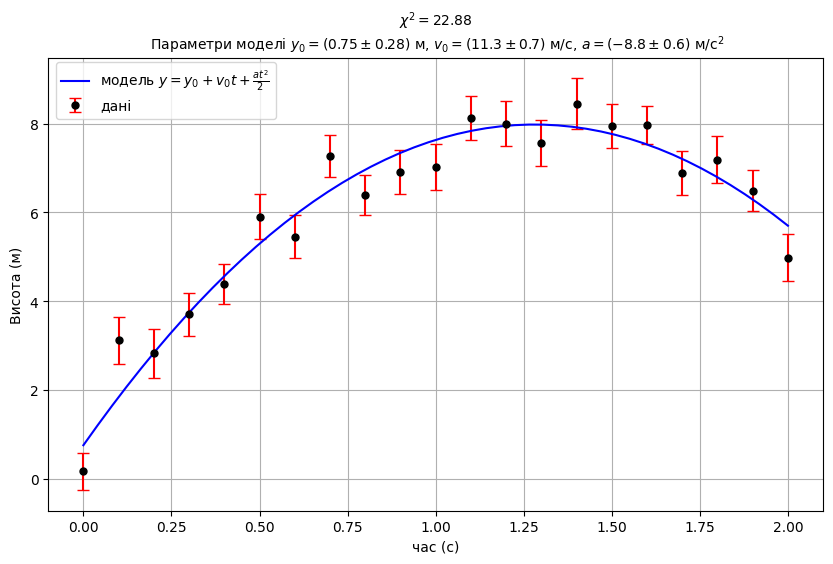

In [ ]:
#@title Алгоритм підбору параметрів
# Модельна функція

def model(t,y0,v0,a):
    return y0 + v0*t + 0.5*a*t**2

# Наближені значення фітингових параметрів
init_guess = [1,1,-10]

# Апроксимація даних
fit = curve_fit(model, d['time'],d['pos'], sigma=d['spos'], p0=init_guess, absolute_sigma=True)

# Запис параметрів у змінні
ans,cov = fit
y0,v0,a = ans
sy0,sv0,sa = np.sqrt(np.diag(cov))

# Побудова даних
plt.grid(True)
plt.errorbar(d['time'],d['pos'],d['spos'], label="дані", fmt='o', ecolor = 'r', color = 'k',  markersize=5, capsize=4)
plt.ylabel("Висота (м)")
plt.xlabel("час (с)")

# Розрахунок хі-квадрату
chisq = sum((d['pos'] - model(d['time'],y0,v0,a))**2/d['spos']**2)

# Побудова графіка за результатами апроксимації
t = np.linspace(0,2)
plt.plot(t, model(t,y0,v0,a), color = 'b', label="модель $y = y_0 + v_0 t + \\frac{at^2}{2}$")
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', borderaxespad=0.)

# Виведення результатів на координатну площину
plt.title('$\\chi^2 = %.2f$\n Параметри моделі $y_0 = (%.2f \\pm %.2f)$ м, '
          '$v_0 = (%.1f \\pm %.1f)$ м/с, '
          '$a = (%.1f \\pm %.1f)$ м/с$^2$'
          %(chisq,y0,sy0,v0,sv0,a,sa),
          fontsize=10,
         )

print("chisq = %.2f"%chisq)
print("y_0 = (%.2f +/- %.2f) м"%(y0,sy0))
print("v_0 = (%.2f +/- %.2f) м/с"%(v0,sv0))
print("a = (%.2f +/- %.2f) м/с^2"%(a,sa))

## Метод найменших повних квадратів

У розглянутому вище методі враховуються лише похибки у залежних величинах $y_i$, а тому виникає обмеження в його використанні лише для випадку коли похибками незалежних змінних можна знехтувати ($\sigma_{x_i} \approx 0$).  Однак, на практиці виникає потреба у такому методі, в якому цими похибками нехтувати не можна. Тому треба будувати суму $\chi^2$ з урахуванням похибок $\sigma_{x_i}$. Ідея такої побудови полягає в тому, щоб в якості
доданків брати не відстань від точки до прямої по вертикалі $d_{\parallel_i} = |y_i - f(x_i)|$, а ортогональну відстань від точки до прямої $d^2_{\perp_i} = (x_i - \tilde{x}_i)^2  + (y_i - \tilde{y}_i)^2$, причому, кожен із доданків в сумі треба взяти з відповідним ваговим коефіцієнтом, що обернений до похибки. Тоді сума для мінімізації прийме вигляд:
\begin{equation}
	\tilde{\chi}^2 = \sum\limits_{i = 1}^n  \left[\left(\frac{x_i - \tilde{x}_i}{\sigma_{x_i}}\right)^2 + \left(\frac{y_i - f(\tilde{x}_i)}{\sigma_{y_i}}\right)^2\right],
\end{equation}
де точка $(\tilde{x}_i,\tilde{y}_i)$ розташована на шуканій прямій на найкоротшій (ортогональній) відстані від експериментальної точки $(x_i, y_i)$.



Розглянемо тепер ті ж самі експериментальні дані, але врахуємо похибку годинника. Тепер наші дані виглядатимуть як [$t$ (с), $y$ (м), $\Delta t$ (с),$\Delta y$ (м)] 

In [ ]:
#@title Викликаємо пакет методу найменших повних квадратів (ODR)
from scipy.odr import ODR, Model, RealData

In [ ]:
#@title Експериментальні дані { vertical-output: true }
data_array = np.array([
          [0.00, 0.16, 0.03, 0.42],
          [0.10, 3.12, 0.03, 0.53],
          [0.20, 2.82, 0.03, 0.55],
          [0.30, 3.70, 0.03, 0.48],
          [0.40, 4.39, 0.03, 0.45],
          [0.50, 5.90, 0.03, 0.51],
          [0.60, 5.45, 0.03, 0.48],
          [0.70, 7.27, 0.03, 0.48],
          [0.80, 6.39, 0.03, 0.44],
          [0.90, 6.91, 0.03, 0.50],
          [1.00, 7.03, 0.03, 0.52],
          [1.10, 8.13, 0.03, 0.49],
          [1.20, 8.00, 0.03, 0.51],
          [1.30, 7.56, 0.03, 0.52],
          [1.40, 8.45, 0.03, 0.57],
          [1.50, 7.95, 0.03, 0.50],
          [1.60, 7.97, 0.03, 0.43],
          [1.70, 6.89, 0.03, 0.50],
          [1.80, 7.19, 0.03, 0.54],
          [1.90, 6.49, 0.03, 0.46],
          [2.00, 4.98, 0.03, 0.53],
])
d = pd.DataFrame(data_array, columns = ['time','pos','stime','spos'])
d

,time,pos,stime,spos
0,0.0,0.16,0.03,0.42
1,0.1,3.12,0.03,0.53
2,0.2,2.82,0.03,0.55
3,0.3,3.70,0.03,0.48
4,0.4,4.39,0.03,0.45
5,0.5,5.90,0.03,0.51
6,0.6,5.45,0.03,0.48
7,0.7,7.27,0.03,0.48
8,0.8,6.39,0.03,0.44
9,0.9,6.91,0.03,0.50


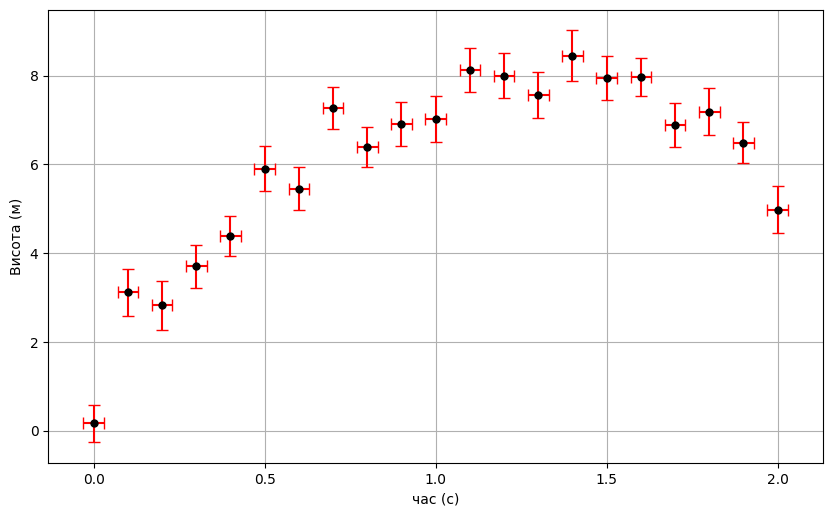

In [ ]:
#@title Графік залежності висоти $y(t)$
plt.errorbar(d['time'],d['pos'],xerr= d['stime'], yerr = d['spos'], fmt='o', ecolor = 'r', color = 'k',  markersize=5, capsize=4)
plt.grid(True)
plt.ylabel("Висота (м)")
plt.xlabel("час (с)")
plt.savefig("dataonly.pdf")

Метод найменших повних квадратів, який враховує похибки як в залежних змінних $y_i$ так і в незалежних змінних $x_i$  реалізується за допомогою алгоритму який називається [Ortohonal Distance Regression](https://en.wikipedia.org/wiki/Total_least_squares). Останній алгоритм важливий для даних, що отримуються в фізичних експериментах. Сам алгоритм був вперше реалізований на мові ```FORTRAN``` під назвою [```ODRPACK```](https://dl.acm.org/doi/10.1145/1268776.1268782), а згодом розповсюджений  в багатьох програмних пакетах по обробці даних.

Задаємо модельну функцію $y = y_0 + v_0 t + \frac{at^2}{2}$

In [ ]:
#@title 
# Задаємо модельну функцію
def model_func(beta, t):
    """
    Визначення математичної моделі для підгони.

    Параметр підгонки beta[0] та beta[1]
    """
    y = beta[0] + beta[1] * t + beta[2] * t ** 2 / 2
    return y

Задаємо наближені значення параметрів моделі

In [ ]:
#@title 
init_guess = [1,1,-10]

Заганяємо дані і модель в алгоритм ODR

In [ ]:
#@title 
# Здійснюємо підгону даних за моделлю
# https://docs.scipy.org/doc/scipy/reference/odr.html

# Створюємо екземпляр моделі
model = Model(model_func)

# Створюємо екземпляр даних data
data = RealData(d['time'], d['pos'], d['stime'], d['spos'])

# Створюємо ODR зі своїми даними, моделлю та початковою оцінкою параметрів
odr = ODR(data, model, init_guess)

# Вибір методу підгонки
odr.set_job(fit_type=0)
output = odr.run()

Будуємо експериментальні дані та маодельну криву і виводимо параметри моделі

chisq = 19.49
y_0 = (0.76 +/- 0.35) м
v_0 = (11.29 +/- 0.77) м/с
a = (-8.82 +/- 0.74) м/с^2


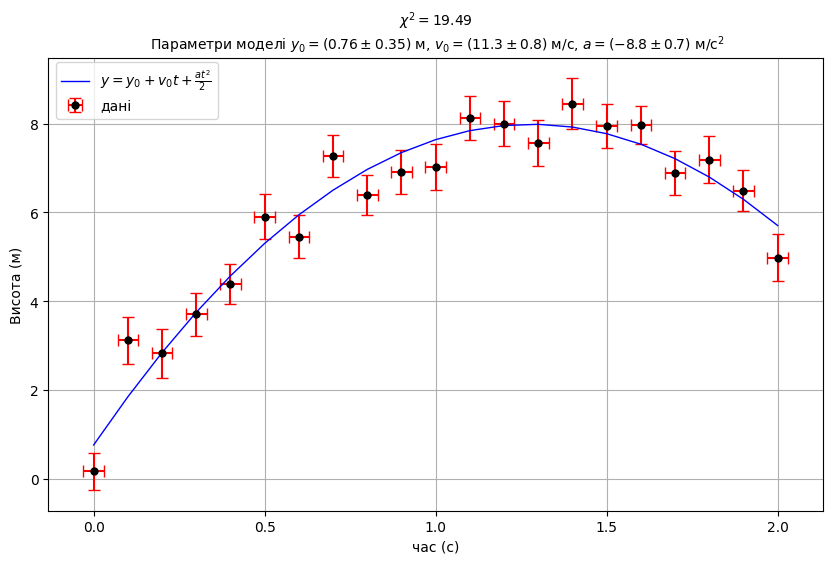

In [ ]:
#@title 
# Побудова даних
plt.grid(True)
plt.errorbar(d['time'],d['pos'],xerr= d['stime'], yerr = d['spos'], fmt='o', ecolor = 'r', color = 'k',  markersize=5, capsize=4, label="дані")
plt.ylabel("Висота (м)")
plt.xlabel("час (с)")

plt.plot(d['time'], model_func(output.beta, d['time']), color="b", linewidth=1, label="$y = y_0 + v_0 t + \\frac{at^2}{2}$")
plt.legend(bbox_to_anchor=(0.01, 0.99), loc='upper left', borderaxespad=0.)

# Виведення результатів на координатну площину
plt.title('$\\chi^2 = %.2f$\n Параметри моделі $y_0 = (%.2f \\pm %.2f)$ м, '
          '$v_0 = (%.1f \\pm %.1f)$ м/с, '
          '$a = (%.1f \\pm %.1f)$ м/с$^2$'
          %(output.res_var*(21-3),
            output.beta[2],output.sd_beta[2],
            output.beta[1],output.sd_beta[1],
            output.beta[0],output.sd_beta[0]),
          fontsize=10,
         )

print("chisq = %.2f"% (output.res_var*(21-3)))
print("y_0 = (%.2f +/- %.2f) м"%(output.beta[2],output.sd_beta[2]))
print("v_0 = (%.2f +/- %.2f) м/с"%(output.beta[1],output.sd_beta[1]))
print("a = (%.2f +/- %.2f) м/с^2"%(output.beta[0],output.sd_beta[0]))

## Як провести успішну апроксимацію?

Для того, щоб скористатись алгоритмами і провести успішну апроксимацію даних, треба дотримуватись наступних правил:


1. Виберіть відповідну модель та визначте число можливих параметрів.
2.   Якщо модель можна лінеаризувати, то краще зробити це.
3. Вкажіть початкові прийнятні значення параметрів моделі.
4. Якщо в результаті апроксимації один з параметрів оцінено з похибкою $\sigma_{p_i} \gg p_i$, що значно перевищує значення самого параметра, то треба покласти знач
